In [6]:
#Four-Hot Encodings

#import the data from the CSV file
import pandas as pd

df = pd.read_csv("data.csv")

df.head()

,index,ResponseID,Are you selfemployed,How many employees does your company or organization have,Is your employer primarily a tech companyorganization,Is your primary role within your company related to techIT,Do you have previous employers,Do you have a family history of mental illness,Have you had a mental health disorder in the past,Do you currently have a mental health disorder,...,What country do you live in,What US state or territory do you live in,What country do you work in,What US state or territory do you work in,Which of the following best describes your work position,Do you work remotely,Question Group,Question about speaking openly about mental health vs physical health,Question,Response
0,0,r00000,False,26-100,True,NaN,True,No,Yes,No,...,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes,Resources for employees with mental health dis...,No,Does your employer provide mental health benef...,Not eligible for coverage / N/A
1,1,r00000,False,26-100,True,NaN,True,No,Yes,No,...,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes,Resources for employees with mental health dis...,No,Do you know the options for mental health care...,NaN
2,2,r00000,False,26-100,True,NaN,True,No,Yes,No,...,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes,Safe and supportive workplce for those with me...,No,Has your employer ever formally discussed ment...,No
3,3,r00000,False,26-100,True,NaN,True,No,Yes,No,...,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes,Resources for employees with mental health dis...,No,Does your employer offer resources to learn mo...,No
4,4,r00000,False,26-100,True,NaN,True,No,Yes,No,...,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes,Resources for employees with mental health dis...,No,Is your anonymity protected if you choose to t...,I don't know


In [7]:
#set the max row displays to be high so we can see more
pd.options.display.max_rows = 999

In [8]:
#print out initial info of our data to familiarize ourselves with it
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60186 entries, 0 to 60185
Data columns (total 28 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   index                                                                                       60186 non-null  int64  
 1   ResponseID                                                                                  60186 non-null  object 
 2   Are you selfemployed                                                                        60186 non-null  bool   
 3   How many employees does your company or organization have                                   48132 non-null  object 
 4   Is your employer primarily a tech companyorganization                                       48132 non-null  object 
 5   Is your primary role within your compan

In [9]:
#describe the output of our data with basic statistics
df.describe()

,index,What is your age
count,60186.000000,60102.000000
mean,30092.500000,34.106219
std,17374.345988,8.283055
min,0.000000,15.000000
25%,15046.250000,28.000000
50%,30092.500000,33.000000
75%,45138.750000,39.000000
max,60185.000000,99.000000


In [10]:
#count how many conditions there are in total
df["If so, what conditions were you diagnosed with"].value_counts()

Mood Disorder (Depression, Bipolar Disorder, etc)                                                                                                                                                                                                                                                7854
Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)                                                                                                                                                                                            6300
Anxiety Disorder (Generalized, Social, Phobia, etc)                                                                                                                                                                                                                                              2688
Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Defici

In [11]:
#count how many conditions you can be diagnosed with
display(df["If so, what conditions were you diagnosed with"].value_counts())

Mood Disorder (Depression, Bipolar Disorder, etc)                                                                                                                                                                                                                                                7854
Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)                                                                                                                                                                                            6300
Anxiety Disorder (Generalized, Social, Phobia, etc)                                                                                                                                                                                                                                              2688
Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Defici

array([[<AxesSubplot: title={'center': 'What is your age'}>]],
      dtype=object)

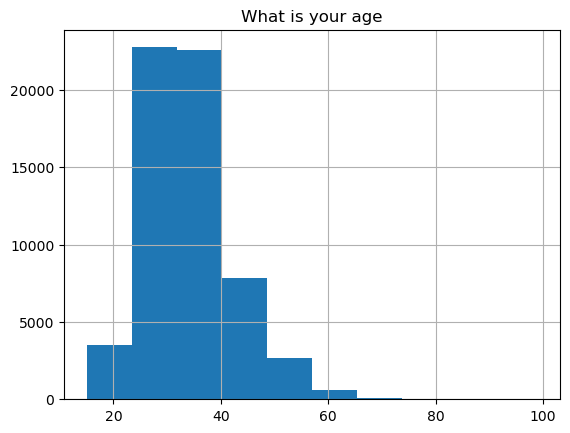

In [12]:
#make a histogram to see the age distribution
df.hist(column='What is your age')

In [13]:
#what do our future labels look like and how are they seperated?
df['Do you currently have a mental health disorder'].value_counts()

Yes      24150
No       22302
Maybe    13734
Name: Do you currently have a mental health disorder, dtype: int64

([<matplotlib.patches.Wedge at 0x7fb29e34dab0>,
 [Text(-1.0474954056850978, 0.3357876934442546, 'Yes'),
  Text(0.5690319472576292, -0.9413833666472925, 'No'),
  Text(0.7227462058960695, 0.82923936343063, 'Maybe')],
 [Text(-0.5713611303736896, 0.18315692369686612, '40.1%'),
  Text(0.31038106214052497, -0.5134818363530685, '37.1%'),
  Text(0.3942252032160379, 0.45231238005307084, '22.8%')])

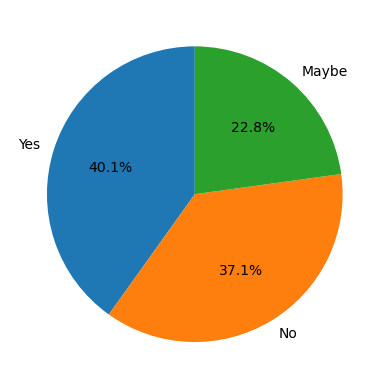

In [14]:
import numpy as np
from matplotlib import pyplot as plt
#chart to see how our labels are distributed
y = np.array([24150/60186,22302/60186, 13734/60186 ])
labels = ["Yes", "No", "Maybe"]
plt.pie(y, labels = labels, autopct='%1.1f%%', startangle=90)

In [15]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

#perform one hot encoding from LabelEncoder from sklearn
for column in df:
    df[column] = le.fit_transform(df[column])

#prepare the features and target variables by dividing train and test data
y = df["Do you currently have a mental health disorder"]
X = df.drop(columns="Do you currently have a mental health disorder")

#set up K-folds cross-validation using KFold from sklearn 
kf = KFold(n_splits=10, shuffle=True, random_state=4)
knn = KNeighborsClassifier(n_neighbors=3)
scores = []

#iterate over the folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train and evaluate the classifier
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    scores.append(score)

#calculate the average performance and print it out
average_score = sum(scores) / len(scores)
print("Average score:", average_score)


Average score: 0.9745289909746864


Average score: 1.0
index 0.011997287657673154
ResponseID 0.012961142509524083
Are you selfemployed 0.0008966243030714293
How many employees does your company or organization have 0.006019662450593219
Is your employer primarily a tech companyorganization 0.002485241023496195
Is your primary role within your company related to techIT 0.001605746985191614
Do you have previous employers 0.0011359684453304054
Do you have a family history of mental illness 0.016515492215355365
Have you had a mental health disorder in the past 0.0756868250706935
If yes, what conditions have you been diagnosed with 0.3132743890812829
If maybe, what conditions do you believe you have 0.3361731894118227
Have you been diagnosed with a mental health condition by a medical professional 0.04886365911390419
If so, what conditions were you diagnosed with 0.080427476608147
Have you ever sought treatment for a mental health issue from a mental health professional 0.03393699002556051
What is your age 0.010583077328190598

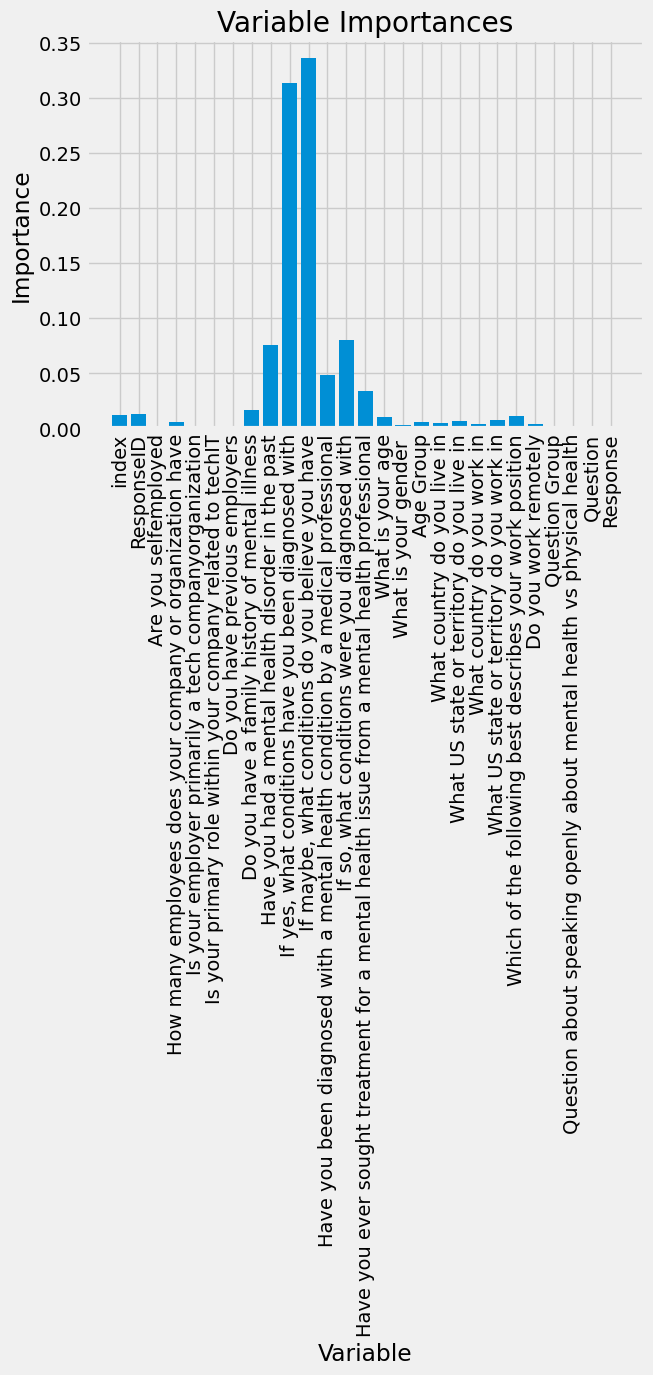

In [16]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')

# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#prepare feature and target variables
y = df["Do you currently have a mental health disorder"]
X = df.drop(columns="Do you currently have a mental health disorder")

#set up K-folds cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=4)

#train and evaluate the Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=4)
scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #fit the random forest classifier
    rfc.fit(X_train, y_train)
    score = rfc.score(X_test, y_test)
    scores.append(score)

#calculate the average performance of the classifier
average_score = sum(scores) / len(scores)
print("Average score:", average_score)

#print feature importances of the model
importances = rfc.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(feature, importance)

#plot feature importances using a bar chart
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation='vertical')
plt.xticks(x_values, X.columns, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


50    35280
49     7560
11     3276
22     2436
34     2016
3      1470
46      798
21      672
28      630
47      420
8       420
35      378
26      378
41      378
10      294
20      294
17      294
30      210
6       210
44      168
40      168
45      168
39      168
4       168
36      126
38      126
12      126
16      126
31       84
29       84
37       84
7        84
0        84
19       84
33       84
14       84
32       84
1        42
42       42
48       42
24       42
13       42
51       42
18       42
25       42
5        42
27       42
2        42
9        42
52       42
23       42
43       42
15       42
Name: What country do you live in, dtype: int64


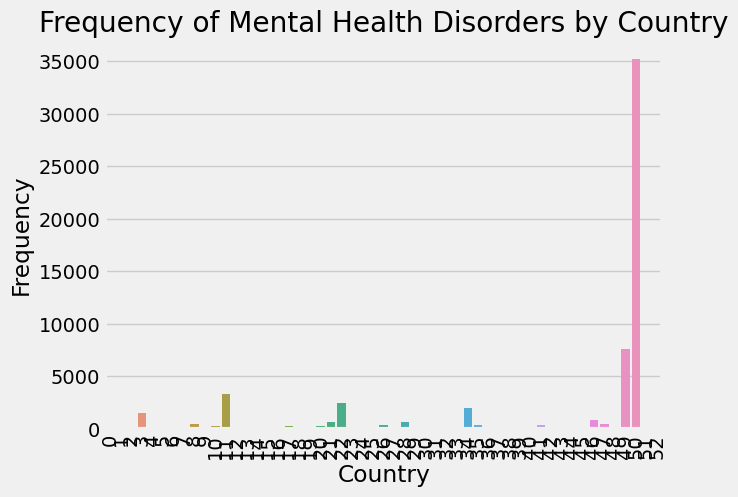

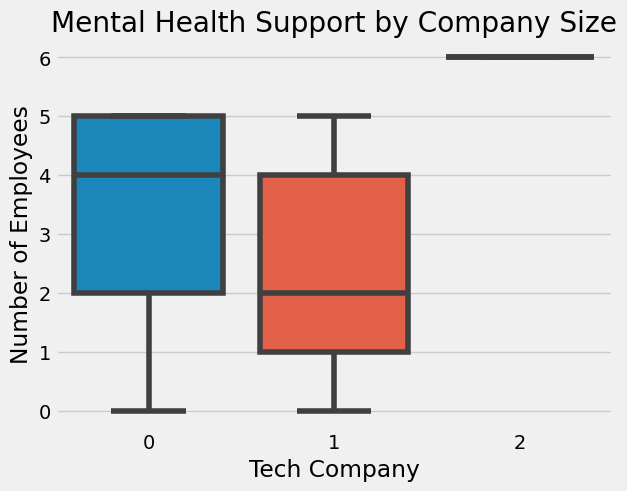

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#compute the counts of mental health disorders by country
country_counts = df['What country do you live in'].value_counts()
print(country_counts)

#visualize the frequency of mental health disorders by country to see how it differs
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title("Frequency of Mental Health Disorders by Country")
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

#explore the relationship between mental health support and the number of employees
sns.boxplot(x='Is your employer primarily a tech companyorganization', y='How many employees does your company or organization have', data=df)
plt.title("Mental Health Support by Company Size")
plt.xlabel("Tech Company")
plt.ylabel("Number of Employees")
plt.show()


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

#create a minmaxscaler object and then use it to scale the feature data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#define a parameter grid so we can search over it
params = {
    #test only the odd values of k for classification
    'n_neighbors': range(1, 15, 2),
     #test L1 and L2 distance metrics
    'p': [1, 2],
    #test the weights based on distance
    'weights': ['uniform', 'distance']
}

#create the gridsearchCV object which will search over the parameters
clf = GridSearchCV(
    #use KNN classifier
    estimator=KNeighborsClassifier(),
    #search over parameter grid
    param_grid=params,
    #the number 
    cv=5,
    #use 5 parallel jobs to speed up the search time
    n_jobs=5,
    #print the progress messages during the searching
    verbose=1,
)

#fit the grid object to the scared feature data and the target variable
clf.fit(X_scaled, y)
#print our the best set of parameters found by the GridSearchCV
print(clf.best_params_)


Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'n_neighbors': 13, 'p': 1, 'weights': 'distance'}


In [19]:
best_params = clf.best_params_
knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], p=best_params['p'], weights=best_params['weights'])

# Iterate over the splits
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train and evaluate the classifier
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    scores.append(score)

#Calculate the average performance
average_score = sum(scores) / len(scores)
print("Average score:", average_score)


#adding in the confusion matrix for the model
# Predict on dataset which model has not seen before
predictions = knn.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Evaluate predictions
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Average score: 0.9999916929722545
1.0
[[1379    0    0]
 [   0 2270    0]
 [   0    0 2369]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1379
           1       1.00      1.00      1.00      2270
           2       1.00      1.00      1.00      2369

    accuracy                           1.00      6018
   macro avg       1.00      1.00      1.00      6018
weighted avg       1.00      1.00      1.00      6018

